In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb
from shapely.ops import nearest_points

%matplotlib inline
%config InlineBackend.figure_format ='retina'

from config import *

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

In [3]:
def getDistance(row):
    cent = row['geometry'].centroid
    return min(cent.distance(m['geometry']) for i, m in df19[df19['metro']].iterrows())

df19['metroDist'] = df19.apply(getDistance, axis=1)

<AxesSubplot:>

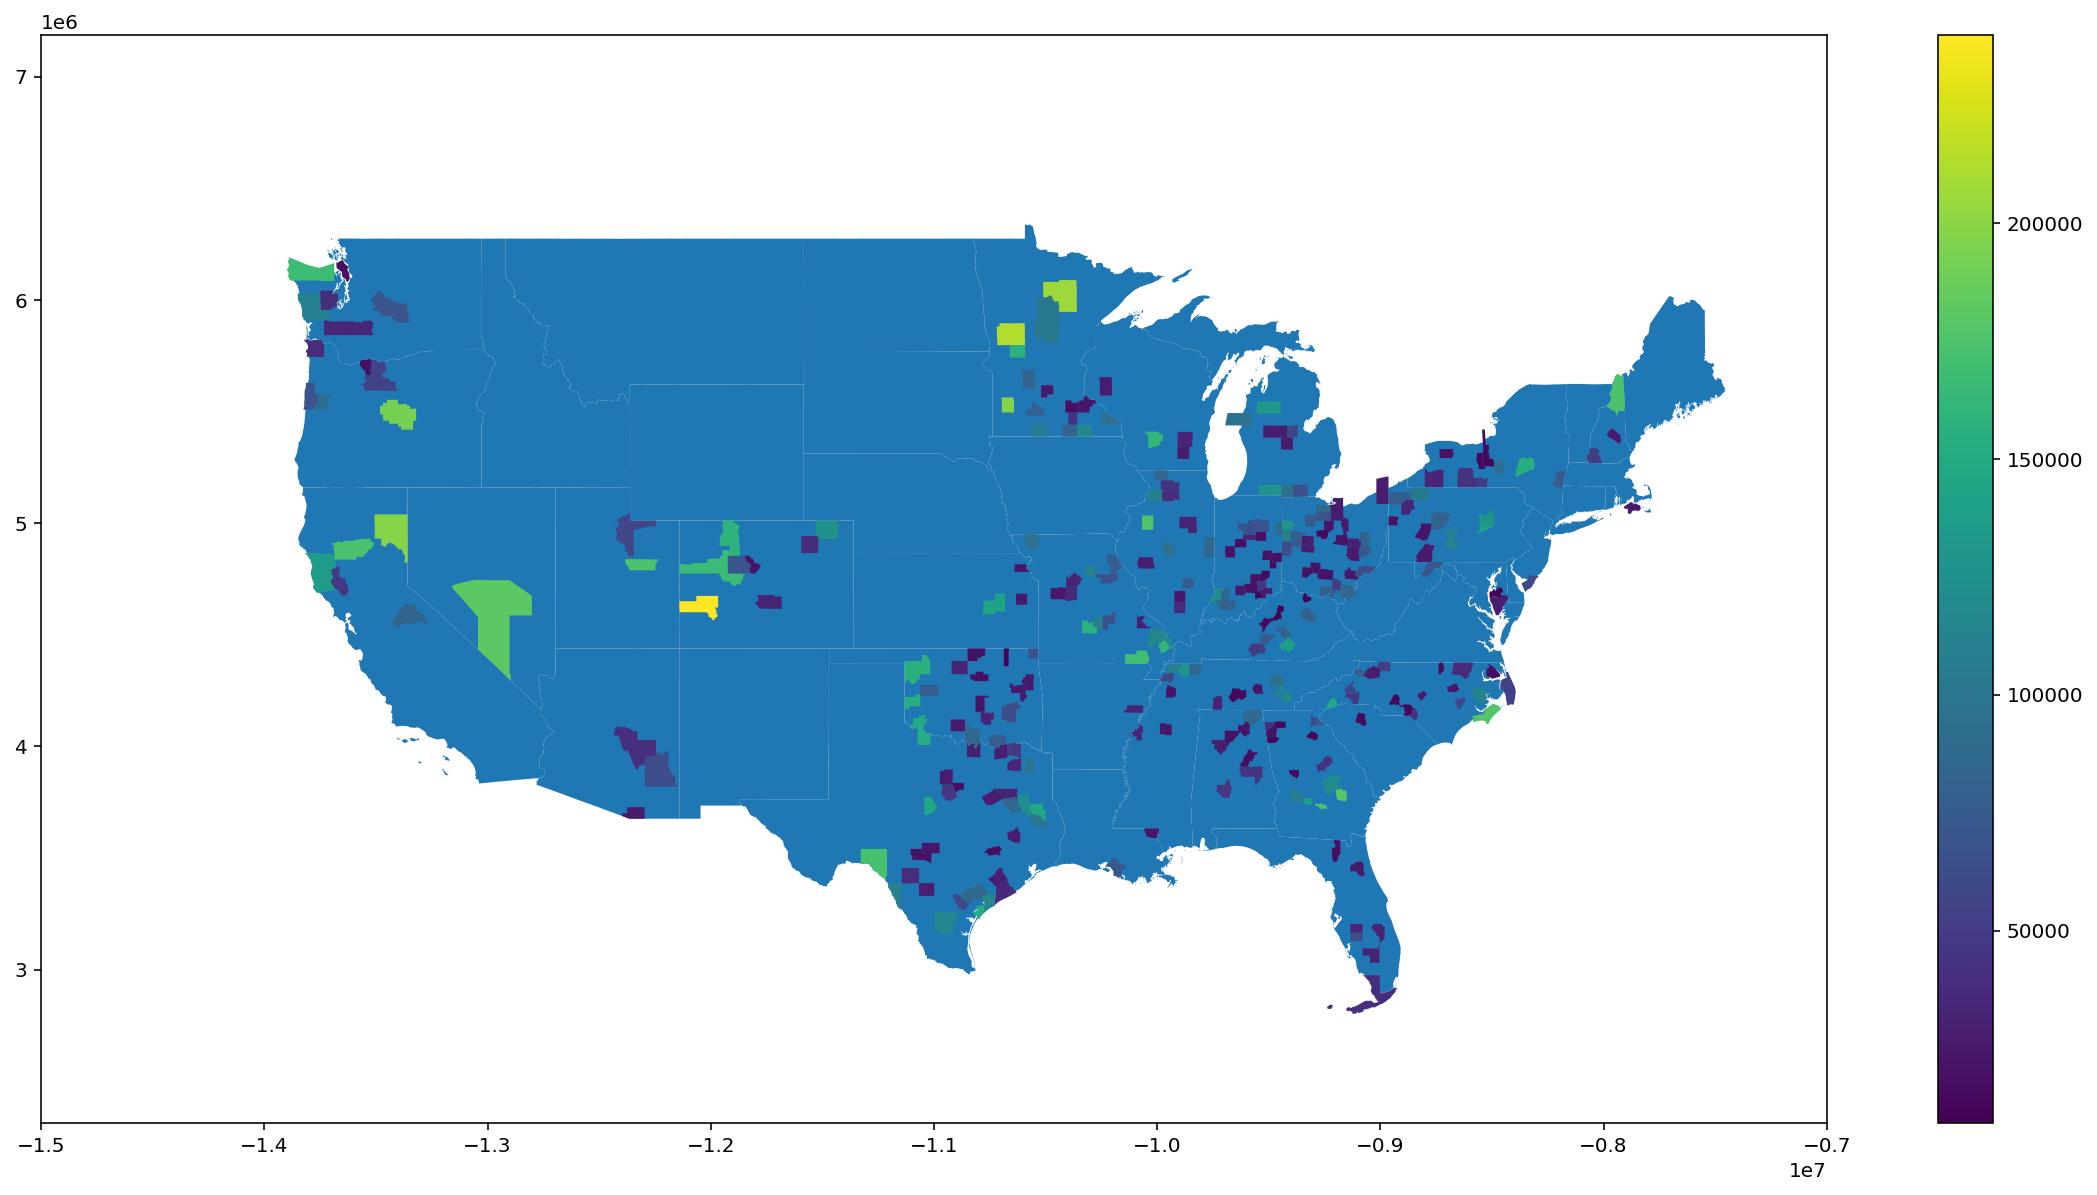

In [4]:
ax = plotUS()
df19[df19['liminal']].plot(ax=ax, column='metroDist', legend=True)

In [5]:
outcomeVars = [
    'RINTERNATIONALMIGw',
    'RDOMESTICMIGw',
    'Median_Income',
    'Pct_HS_Above',
    'Pct_BS_Above',
    'Tot_Units',
]

explainVars = [
    'commutePercent',
    'Median AQI',
    'POPESTIMATE',
    'avg_d_kbps',
    'HPI with 2000 base',
    'Median_Age',
    'metroDist'
]

allVars = outcomeVars + explainVars

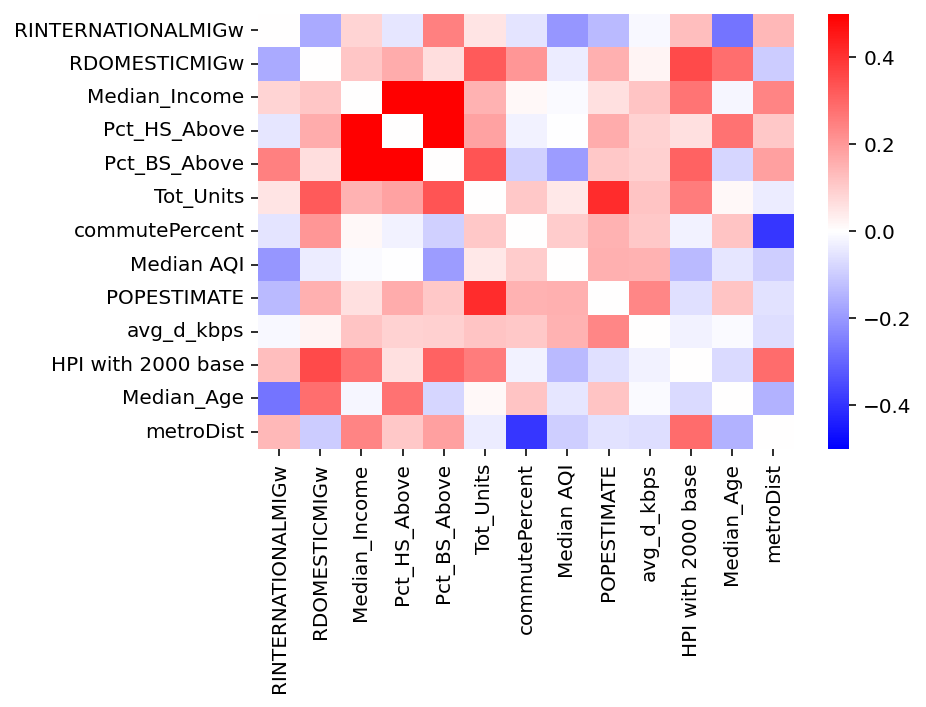

In [6]:
corr = df19[df19['micro']][allVars].corr()
np.fill_diagonal(corr.values, 0)
sb.heatmap(corr, cmap='bwr', vmin=-0.5, vmax=0.5);